## Examen 2do Parcial - Karime Jiménez

*Usar los métodos de ML no supervisado en: (k-means, Gaussian mixture, cluster jerárquico)

In [2]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Usando dataset de Coactivation matrix

In [43]:
path = r"C:\Users\karim\OneDrive\Documentos\Neurociencias-2025-2\S03_datasets\Coactivation_matrix.mat"
contents = scipy.io.loadmat(path)
contents.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Coactivation_matrix', 'Coord'])

In [47]:
coactivation_matrix = contents['Coactivation_matrix']
coactivation_matrix.shape

(638, 638)

A. Utilizar el método del codo para determinar el número de cluster óptimo (adecuado)

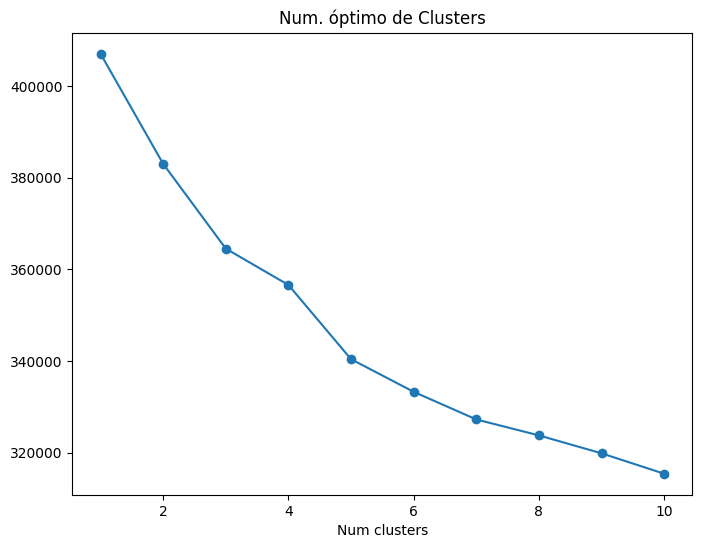

In [53]:
X = coactivation_matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, inertia, marker ="o")
plt.xlabel("Num clusters")
plt.title("Num. óptimo de Clusters")
plt.show()

2. Usando Brain tumor:

In [4]:
path = r"C:\Users\karim\OneDrive\Documentos\Neurociencias-2025-2\S03_datasets\Brain_tumor\Brain Tumor.csv"
df = pd.read_csv(path)
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


A. Utiliza el método del codo para determinar el número de cluster óptimo (adecuado)

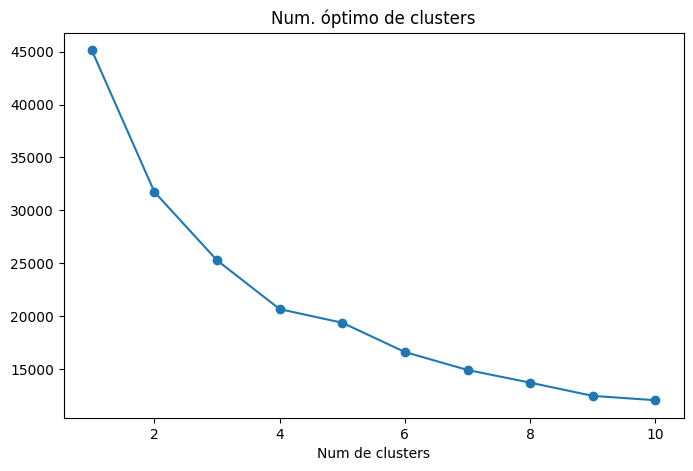

In [5]:
features = df.drop(columns=["Image", "Class"])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker="o")
plt.title("Num. óptimo de clusters")
plt.xlabel("Num de clusters")
plt.show()

B. Utilizar 2 clusters en cada método y calcular la matriz de confusión de cada método usando la columna "Class" como groundthruth

In [6]:
X = df.drop(columns=["Image", "Class"])
y = df["Class"]

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(X)
# Clustering Jerárquico
agg = AgglomerativeClustering(n_clusters = 2)
clusters_agg = agg.fit_predict(X)
# Gaussian
gmm = GaussianMixture(n_components=2, random_state=42)
clusters_gmm = gmm.fit_predict(X)

confmatrix_kmeans = confusion_matrix(y, clusters_kmeans)
confmatrix_agg = confusion_matrix(y, clusters_agg)
confmatrix_gmm = confusion_matrix(y, clusters_gmm)

print("Matriz de confusión KMeans:\n",confmatrix_kmeans)
print("Matriz de confusión Clustering Jerárquico:\n",confmatrix_agg)
print("Matriz de confusion Gaussian Mixture:\n",confmatrix_gmm)

Matriz de confusión KMeans:
 [[1751  328]
 [ 951  732]]
Matriz de confusión Clustering Jerárquico:
 [[1861  218]
 [1094  589]]
Matriz de confusion Gaussian Mixture:
 [[ 127 1952]
 [ 647 1036]]


C. ¿Qué método recomendarías para este dataset?, ¿porque?

*Clustering jerárquico* porque no hace suposiciones estrictas como KMeans y es menos sensible a la forma de clusters, al igual puede funcionar mejor en clusters con una forma irregular, aunque es preferible que los datos tengan estructuras jerárquicas.

3. De su previa investigación:

- ¿Qué es precisión?: mide la proporción de predicciones positivas que fueron correctas, útil cuando el costo de un falso positivo es alto
- ¿Qué es accuracy?: mide la proporción de predicciones correctas sobre el total de muestras, buena métrica cuando las clases están balanceada
- ¿Qué es recall?: mide la proporción de casos positivos correctamente detectados
- ¿Qué es f1-score?: es la media armónica entre precisión y recall (balance entre ambos), útil cuando se requiere un equilibrio entre no dar falsos positivos ni dejar pasar positivos reales

4. ¿Cómo se relacionan las definiciones anteriores a la matriz de confusión?

Matriz de confusión: base donde se derivan todas las métricas anteriores (precisión, accuracy, recall, f1-score).
1. Precisión: cuando es muy importante NO dar falsos positivos
2. Accuracy: mide que tan bien acertó el modelo en genral
3. Recall: cuando es importante no dejar pasar positivos, o sea falsos negativos
4. F1-score: hace un balance entre la precisión y recall

5. A partir del resultado 1. B, calcular precisión, accuracy, recall y f1-score

In [7]:
precision = precision_score(y, clusters_kmeans)
accuracy = accuracy_score(y, clusters_kmeans)
recall = recall_score(y, clusters_kmeans)
f1 = f1_score(y, clusters_kmeans)
print(f"Precisión K-means:{precision}")
print(f"Accuracy K-means:{accuracy}")
print(f"Recall K-means:{recall}")
print(f"F1-score K-means:{f1}")

Precisión K-means:0.690566037735849
Accuracy K-means:0.6600212652844232
Recall K-means:0.43493761140819964
F1-score K-means:0.5337222019686475
